# Description:                                                                                                                   
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Step 0: Import libraries and Dataset

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import pandas as pd

# Load the dataset from a txt file, it's space-separated
dataset = pd.read_csv('diabetes_dataset.txt', sep="\s+", header=None)

# Define your column names
column_names = ['output', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
                'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Assign the new column names
dataset.columns = column_names




# Step 1: Descriptive Statistics

In [ ]:
# Preview data
dataset.head()

,output,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-1,1:6.000000,2:148.000000,3:72.000000,4:35.000000,5:0.000000,6:33.599998,7:0.627000,8:50.000000
1,1,1:1.000000,2:85.000000,3:66.000000,4:29.000000,5:0.000000,6:26.600000,7:0.351000,8:31.000000
2,-1,1:8.000000,2:183.000000,3:64.000000,4:0.000000,5:0.000000,6:23.299999,7:0.672000,8:32.000000
3,1,1:1.000000,2:89.000000,3:66.000000,4:23.000000,5:94.000000,6:28.100000,7:0.167000,8:21.000000
4,-1,1:0.000000,2:137.000000,3:40.000000,4:35.000000,5:168.000000,6:43.099998,7:2.288000,8:33.000000


In [ ]:
# Remove the prefixes and keep the numeric part
for col in ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']:
    dataset[col] = dataset[col].str.split(':').str[1]  # Keep the part after ':'

In [ ]:
# Preview data
dataset.head()

,output,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-1,6.000000,148.000000,72.000000,35.000000,0.000000,33.599998,0.627000,50.000000
1,1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000
2,-1,8.000000,183.000000,64.000000,0.000000,0.000000,23.299999,0.672000,32.000000
3,1,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000
4,-1,0.000000,137.000000,40.000000,35.000000,168.000000,43.099998,2.288000,33.000000


In [ ]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [ ]:
# Count of null values
dataset.isnull().sum()

,0
output,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0


## Observations:
1. This dataset contains 768 records in total with 9 features.
2. Each feature can be either of integer or float data type.
3. Some features like Glucose, Blood pressure, Insulin, BMI have zero values which are actually missing values.
4. There are no NaN values in this dataset.
5. In the outcome column, 1 stands for diabetes positive and 0 stands for diabetes negative.

# Step 3: Data Preprocessing


In [ ]:
sns.set(style="whitegrid", palette="deep")


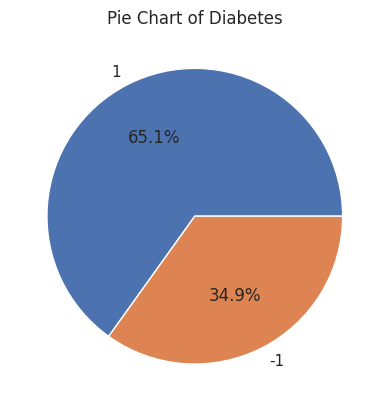

In [ ]:
# Pie chart untuk variable 'diabetes'
diabetes_counts = dataset['output'].value_counts()
plt.pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Diabetes')
plt.show()

In [ ]:

# Convert the columns to numeric
dataset[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']] = dataset[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']].apply(pd.to_numeric, errors='coerce')


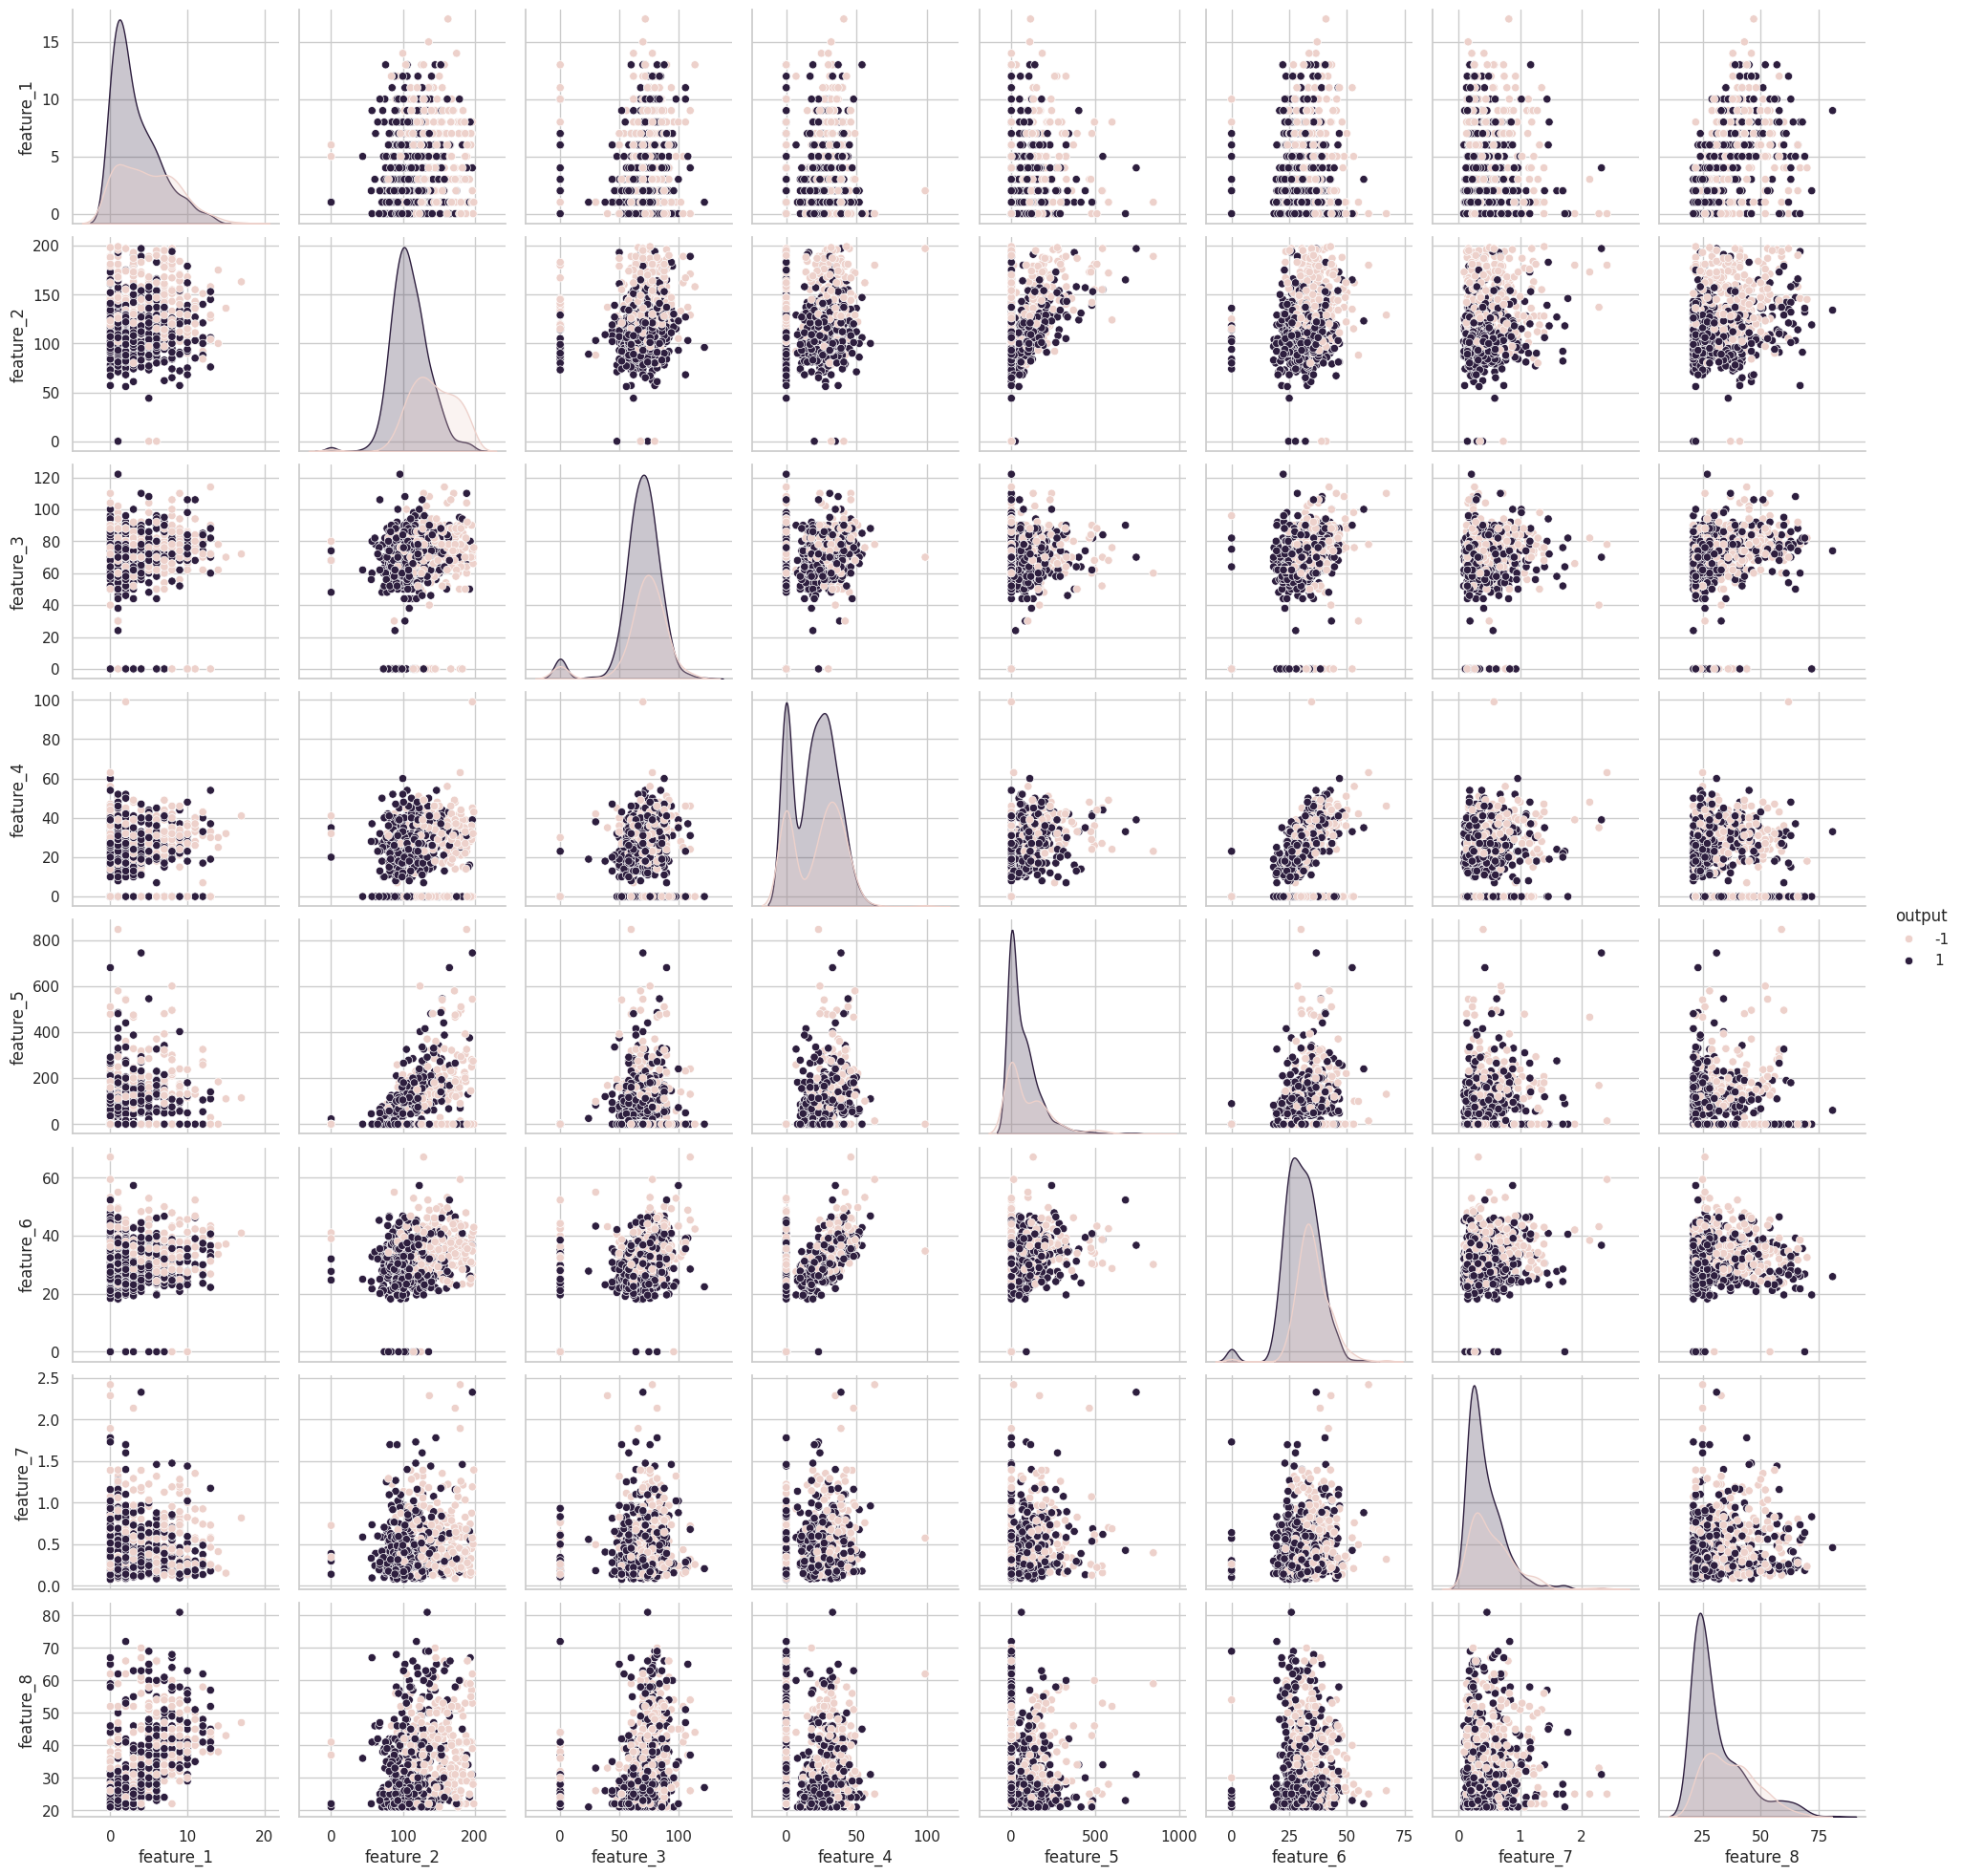

In [ ]:
# Pairplot
sns.pairplot(data = dataset, hue = 'output')
plt.show()

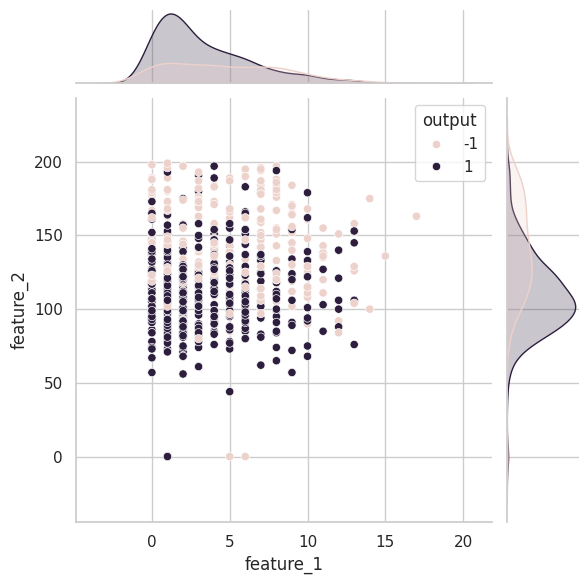

In [ ]:
sns.set(style="whitegrid", palette="deep")
a = dataset['feature_1']
b = dataset['feature_2']
sns.jointplot(dataset ,x=a,y=b,hue='output');

## Observations:
1. Countplot - Informs about an imbalance in the dataset in terms of numbers between patients without diabetes being greater than those with diabetes.
2. The correaltion heatmap shows very high correaltion of Outcome with [Glucose, BMI, Age, Insulin]; hence, we can select these features to accept input from the user and predict the outcome.

In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
output,768.0,0.302083,0.953903,-1.000,-1.000000,1.0000,1.000000,1.000000
feature_1,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.000000,17.000000
feature_2,768.0,120.894531,31.972618,0.000,99.000000,117.0000,140.250000,199.000000
feature_3,768.0,69.105469,19.355807,0.000,62.000000,72.0000,80.000000,122.000000
feature_4,768.0,20.536458,15.952218,0.000,0.000000,23.0000,32.000000,99.000000
feature_5,768.0,79.799479,115.244002,0.000,0.000000,30.5000,127.250000,846.000000
feature_6,768.0,31.992578,7.884160,0.000,27.299999,32.0000,36.599998,67.099998
feature_7,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.626250,2.420000
feature_8,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.000000,81.000000


In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [ ]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [ ]:
dataset_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,1.0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.0,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,1.0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.0,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [ ]:
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 0].values

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 42, stratify = dataset['output'] )

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Step 3: Model Training

In [ ]:
# Create the Perceptron model
perceptron = Perceptron()

# Train the model
perceptron.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 68.83%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.22      0.33        54
         1.0       0.69      0.94      0.80       100

    accuracy                           0.69       154
   macro avg       0.68      0.58      0.56       154
weighted avg       0.68      0.69      0.63       154



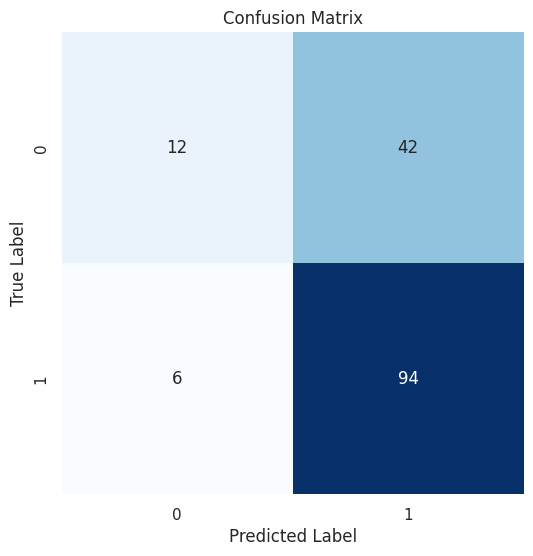

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))  # Set the figure size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)  # 'fmt="d"' ensures integers in the cells
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

